In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
# Load the wine dataset

wine = load_wine()
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = wine.target

print(X)
print(X.info())
print(X.describe())
print(X.shape)

print(y)
print(y.shape)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]
<cl

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Silhouette Score')

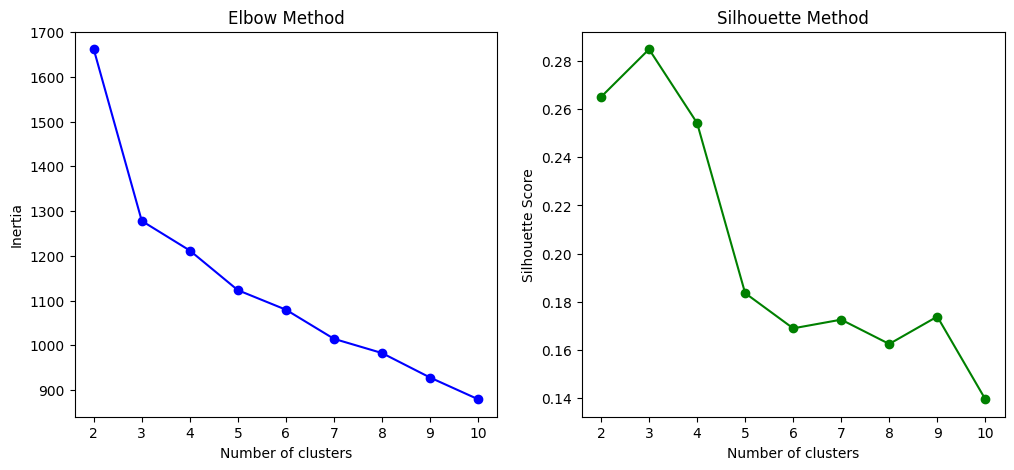

In [9]:
inertia = []
silhouette = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled,kmeans.labels_))
    

#Plot

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(K,inertia,'bo-')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(K,silhouette,'go-')
ax[1].set_title('Silhouette Method')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')

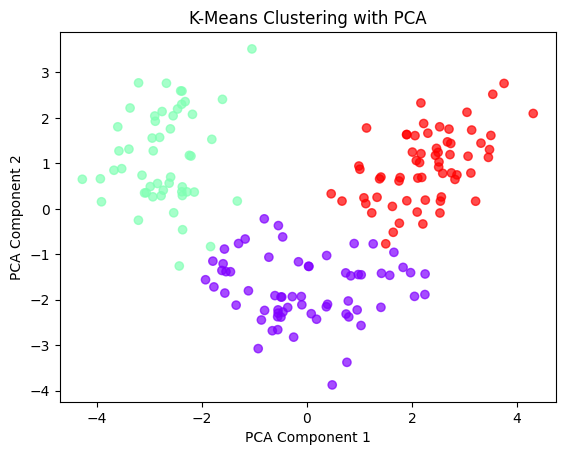

In [18]:
# kmeans with optimal k = 3

kmeans = KMeans(n_clusters=3,random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y_kmeans,cmap='rainbow',alpha=0.7)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


[[ 0  0 59]
 [65  3  3]
 [ 0 48  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.06      0.04      0.05        71
           2       0.00      0.00      0.00        48

    accuracy                           0.02       178
   macro avg       0.02      0.01      0.02       178
weighted avg       0.02      0.02      0.02       178



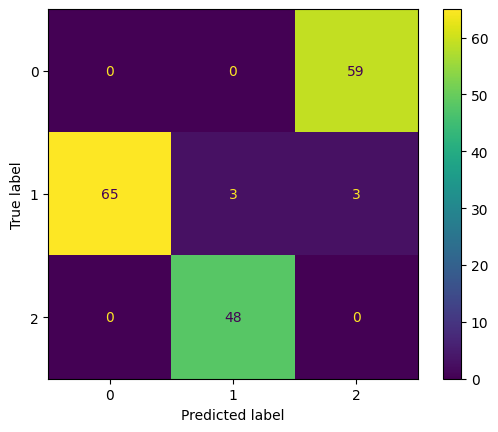

In [23]:
#Compare with Actual Classes

cm = confusion_matrix(y,y_kmeans)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y,y_kmeans))

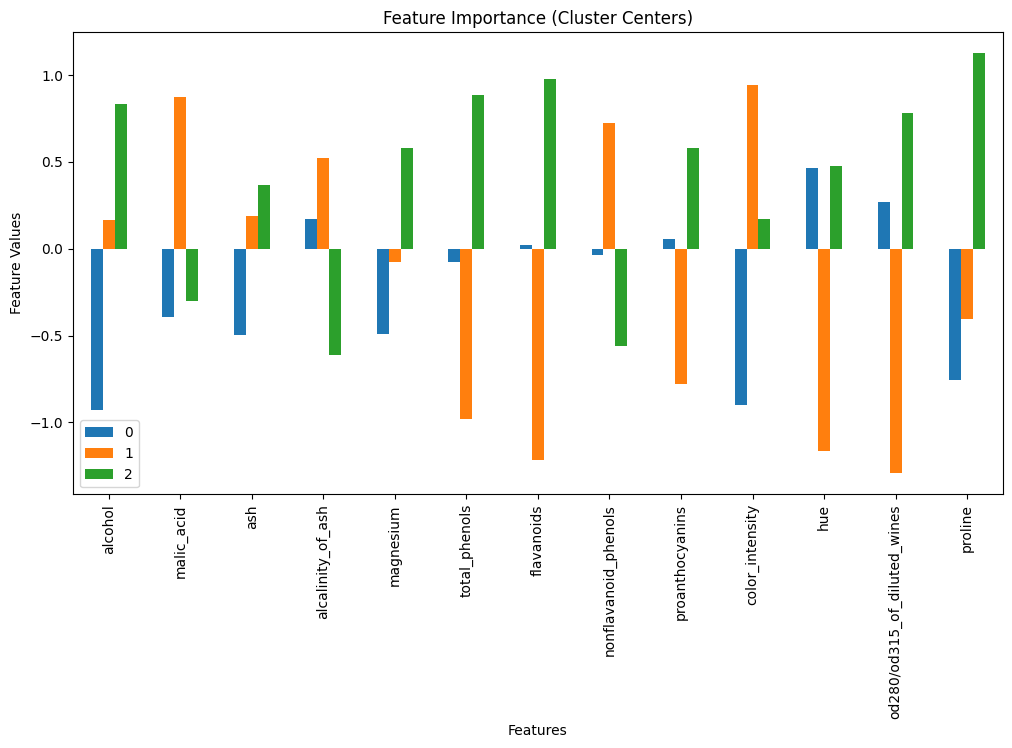

In [24]:
#Feature Importance (Which chemicals matter?)

centers = pd.DataFrame(kmeans.cluster_centers_,columns=wine.feature_names)
centers.T.plot(kind='bar',figsize=(12,6))
plt.title('Feature Importance (Cluster Centers)')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.show()


Hungarian Algorithm

In [25]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix, classification_report

# y = true labels
# y_kmeans = predicted cluster labels

cm = confusion_matrix(y, y_kmeans)

# Hungarian algorithm to find best mapping
row_ind, col_ind = linear_sum_assignment(-cm)  # maximize matching

# Create a mapping dictionary
mapping = {col: row for row, col in zip(row_ind, col_ind)}

# Apply mapping to predictions
y_kmeans_mapped = np.array([mapping[label] for label in y_kmeans])

# Re-check confusion matrix & report
print("Confusion Matrix after remapping:\n", confusion_matrix(y, y_kmeans_mapped))
print("\nClassification Report:\n", classification_report(y, y_kmeans_mapped))


Confusion Matrix after remapping:
 [[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.92      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



In [27]:
centers = kmeans.cluster_centers_
feature_importance = np.max(centers, axis=0) - np.min(centers, axis=0)
top_features = np.argsort(feature_importance)[::-1][:5]  # Top 5 separating features
print([wine.feature_names[i] for i in top_features])


['flavanoids', 'od280/od315_of_diluted_wines', 'proline', 'total_phenols', 'color_intensity']


Insights from Wine Dataset

KMeans works very well on Wine data → chemical features are naturally separable.

Most confusion happens in Class 1 wines → some of their chemical composition overlaps with others.

Chemicals like Flavanoids, Alcohol, Proline tend to be the strongest features separating wines (we can check feature importance with PCA/visualization later).

✅ Key Takeaway:
KMeans can successfully cluster wines into their true categories with very high accuracy (~97%), but we always need to remap clusters to interpret results against labels.

✅ Summary Insight:
Your KMeans clustering shows that wines can be separated by alcohol content, flavanoids, proline, malic acid, and color intensity. These are the key chemical fingerprints of wine types.
